## Consigna 1:
La posición de una masa enganchada a un resorte responde a la ecuación de oscilación amortiguada: <br>
$ x(t) = 0.0502 e^{-t} \cos{(9.95 t - 0.0997)}$<br>
Crear un dataframe pandas con la posición y el tiempo de la masa<br>
Agregar dos columnas: con el resultado obtenido de determinar su velocidad y su aceleración <br>
Plotear un gráfico con la velocidad en función del tiempo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

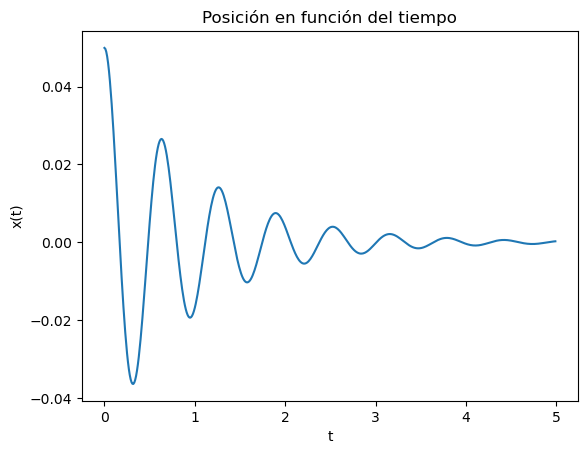

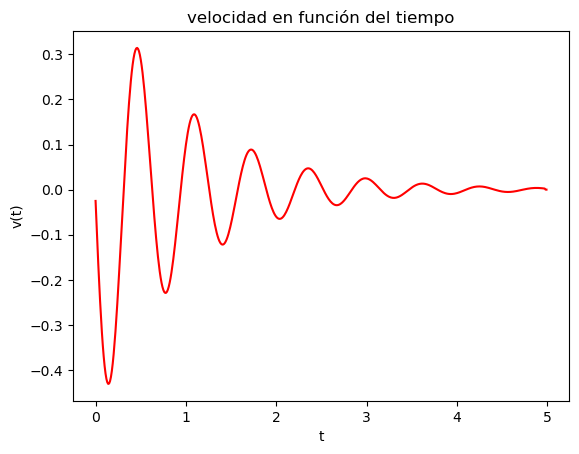

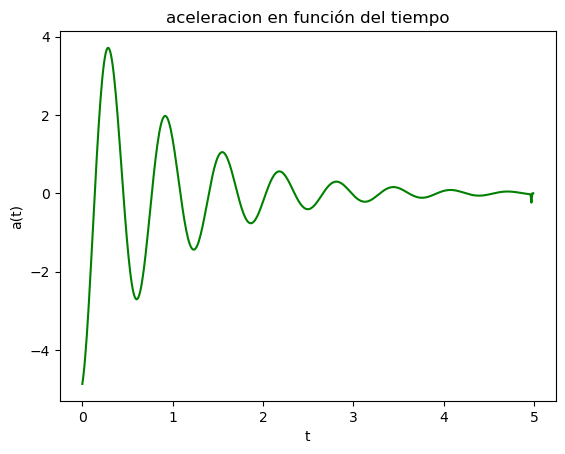

In [3]:
def x(t):
    return 0.0502*np.e**(-t)*np.cos(9.95*t-0.0997)

h = 0.01
t = np.arange(0,5,h)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Posición en función del tiempo')
plt.plot(t,x(t))
plt.show()

df = pd.DataFrame({
    't':t,
    'x':x(t)
})

def deriv(x,t):

    h = t[1] - t[0]
    derivada = np.zeros(len(t))

    for i in range(len(t)-2):
        derivada[i]= (x[i+1] - x[i] )/h
        
    derivada[len(t)-1] = derivada[len(t)-2]
    return  derivada

df['v'] = deriv(df['x'],df['t'])
df['a'] = deriv(df['v'],df['t'])

plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('velocidad en función del tiempo')
plt.plot(df['t'],df['v'],color = 'red')
plt.show()

plt.xlabel('t')
plt.ylabel('a(t)')
plt.title('aceleracion en función del tiempo')
plt.plot(df['t'],df['a'],color = 'green')
plt.show()

## Consigna 2:
Levantar el archivo del campus virtual llamado serie_tiempo_temperatura.csv<br>
Hacer un paneo general del dataset para ver el nombre de las columnas y de qué se trata la información, de ser necesario, considerar una conversión de unidades.<br>
Con el dataframe inicial, crear un scatter plot para ver a distribución de la temperatura Argentina y los países vecinos que contenga el dataset 
Por otro lado, y con todo lo aprendido, plotear en el mismo gráfico la temperatura máxima y mínima alcanzada cada año.<br>
(pssss: de ser necesario, ir creando otros dataframe temporales agrupando y filtrando las columnas que necesite, analizando previamente qué valores únicos contiene.)<br>

In [30]:
df_tmp = pd.read_csv(r'/Users/daianadominikow/Library/CloudStorage/OneDrive-inspt.utn.edu.ar/INSPT/Computacion 3/recursos/recursos tp compu 3 - pandas/serie_tiempo_temperaturas.csv')
df_tmp.head()

,Year,Country,City,AvgTemperature
0,1995,Argentina,Buenos Aires,61.701370
1,1995,Bahamas,Nassau,76.628493
2,1995,Barbados,Bridgetown,80.766849
3,1995,Belize,Belize City,-44.337190
4,1995,Bermuda,Hamilton,69.420548


In [34]:
print(df_tmp.columns)

Index(['Year', 'Country', 'City', 'AvgTemperature'], dtype='object')


In [37]:
print(df_tmp.describe())

              Year  AvgTemperature
count   615.000000      615.000000
mean   2007.021138       62.402992
std       7.388556       28.255087
min    1995.000000      -99.000000
25%    2001.000000       60.901096
50%    2007.000000       70.383607
75%    2013.000000       76.871918
max    2020.000000       84.477808


In [52]:
def f_to_c(t):
    return (t -32)/1.8

In [53]:
df_tmp['AvgTemperatureCelsius'] = f_to_c(df_tmp['AvgTemperature'] )

In [54]:
df_tmp.Country.unique()

array(['Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Colombia', 'Costa Rica', 'Cuba', 'Dominican Republic',
       'Equador', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Nicaragua',
       'Panama', 'Peru', 'Suriname', 'Uruguay', 'Venezuela'], dtype=object)

In [66]:
paises=['Argentina','Brazil', 'Peru',  'Uruguay']
df_america_sur_tmp = df_tmp.loc[df_tmp['Country'].isin(paises)]

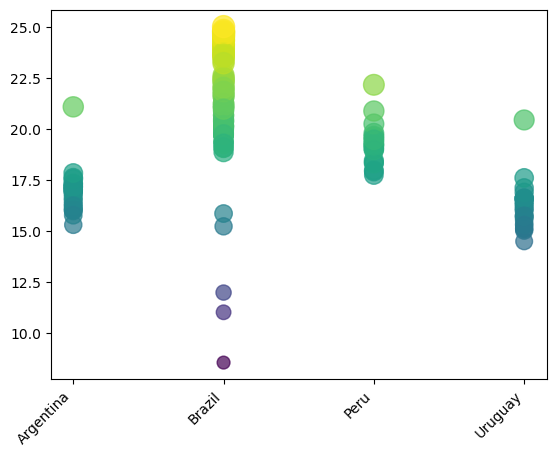

In [69]:
plt.xticks(rotation=45, ha='right') # giro 45 grados las etiquetas del eje x para que no se me encimen
#plt.ylim(-10, max(df_america_sur_tmp['AvgTemperatureCelsius'])) # limite del eje y:  desde y hasta

plt.scatter(df_america_sur_tmp['Country'], #eje x
            df_america_sur_tmp['AvgTemperatureCelsius'], #eje y 
            s = df_america_sur_tmp['AvgTemperatureCelsius']*10, # s : size
            c =df_america_sur_tmp['AvgTemperatureCelsius'], # c : color
            alpha = 0.7 ) # alpha : opacidad del color

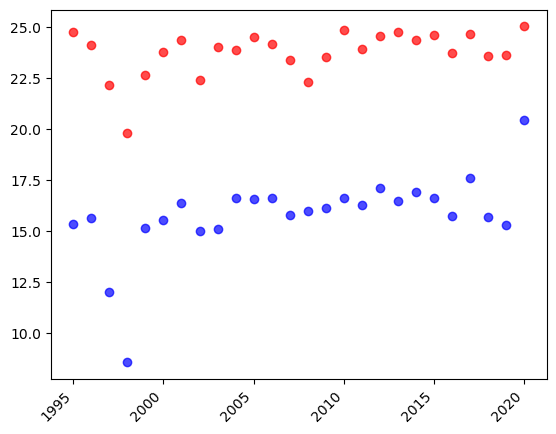

In [70]:
plt.xticks(rotation=45, ha='right') # giro 45 grados las etiquetas del eje x para que no se me encimen
df_america_sur_max = df_america_sur_tmp.groupby(['Year'])['AvgTemperatureCelsius'].max().reset_index(name='maxTemperature')
df_america_sur_min = df_america_sur_tmp.groupby(['Year'])['AvgTemperatureCelsius'].min().reset_index(name='minTemperature')
plt.scatter(df_america_sur_max['Year']
            ,df_america_sur_max['maxTemperature']
            ,color = 'red'
            ,alpha=0.7)
plt.scatter(df_america_sur_min['Year']
            ,df_america_sur_min['minTemperature']
            ,color = 'blue'
            ,alpha=0.7)
plt.show()